In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from typing import Dict, List, Tuple, Optional, Union
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('ggplot')
sns.set_style('whitegrid')

## Data Loading and Preprocessing

In [2]:
# Load historical price data
historical_data = pd.read_csv("../data/processed/binance/merged_historical_data.csv")
historical_data['date'] = pd.to_datetime(historical_data['timestamp'])
historical_data.set_index('date', inplace=True)

# Load funding rate data
funding_data = pd.read_csv("../data/processed/binance/merged_funding_data.csv")
funding_data['date'] = pd.to_datetime(funding_data['timestamp'])

# Load volume and liquidity data
volume_liquidity_data = pd.read_csv("../data/processed/binance/merged_trading_volume_liquidity_data.csv")
volume_liquidity_data['date'] = pd.to_datetime(volume_liquidity_data['timestamp'])

# Display data summary
print(f"Historical data period: {historical_data.index.min()} to {historical_data.index.max()}")
print(f"Number of pairs in historical data: {historical_data['pair'].nunique()}")
print(f"Number of funding rate records: {len(funding_data)}")
print(f"Number of pairs with funding rates: {funding_data['pair'].nunique()}")

Historical data period: 2023-05-11 00:00:00 to 2025-05-10 00:00:00
Number of pairs in historical data: 8
Number of funding rate records: 16914
Number of pairs with funding rates: 9


In [3]:
historical_data.head()

,timestamp,open,high,low,close,volume,daily_return,volatility,log_return,pair
date,,,,,,,,,,
2023-05-11,2023-05-11,0.051756,0.036446,0.042333,0.038686,0.031083,-0.022705,0.033101,-0.022967,BTC_USDC
2023-05-12,2023-05-12,0.038691,0.025180,0.023110,0.034933,0.087623,-0.006674,0.047050,-0.006696,BTC_USDC
2023-05-13,2023-05-13,0.035016,0.024352,0.041925,0.034460,0.012799,-0.000987,0.013180,-0.000987,BTC_USDC
2023-05-14,2023-05-14,0.034677,0.027605,0.039650,0.037570,0.012862,0.005191,0.022963,0.005178,BTC_USDC
2023-05-15,2023-05-15,0.037552,0.037280,0.042927,0.042413,0.036922,0.008673,0.034395,0.008635,BTC_USDC


In [4]:
funding_data.head()

,timestamp,pair,rate,pair_base,quote,rate_norm,date
0,2024-01-02 16:00:00.000,BNB/USDC:USDC,0.0001,BNB/USDC,USDC,0.700673,2024-01-02 16:00:00
1,2024-01-03 00:00:00.000,BNB/USDC:USDC,0.0001,BNB/USDC,USDC,0.700673,2024-01-03 00:00:00
2,2024-01-03 08:00:00.000,BNB/USDC:USDC,0.0001,BNB/USDC,USDC,0.700673,2024-01-03 08:00:00
3,2024-01-03 16:00:00.000,BNB/USDC:USDC,0.0001,BNB/USDC,USDC,0.700673,2024-01-03 16:00:00
4,2024-01-04 00:00:00.000,BNB/USDC:USDC,0.0001,BNB/USDC,USDC,0.700673,2024-01-04 00:00:00


In [5]:
volume_liquidity_data.head()

,timestamp,open,high,low,close,volume,pair,bid,ask,spread,daily_return,volatility,log_return,date
0,2023-05-11,0.051756,0.036446,0.042333,0.038686,0.031083,BTC/USDC,0.958695,0.958695,0.000000e+00,-0.022705,0.033101,-0.022967,2023-05-11
1,2023-05-12,0.038691,0.025180,0.023110,0.034933,0.087623,BTC/USDC,0.955288,0.955288,2.933854e-12,-0.006674,0.047050,-0.006696,2023-05-12
2,2023-05-13,0.035016,0.024352,0.041925,0.034460,0.012799,BTC/USDC,0.955288,0.955288,2.933854e-12,-0.000987,0.013180,-0.000987,2023-05-13
3,2023-05-14,0.034677,0.027605,0.039650,0.037570,0.012862,BTC/USDC,0.955288,0.955288,2.933854e-12,0.005191,0.022963,0.005178,2023-05-14
4,2023-05-15,0.037552,0.037280,0.042927,0.042413,0.036922,BTC/USDC,0.955288,0.955288,2.933854e-12,0.008673,0.034395,0.008635,2023-05-15


In [6]:
sol_usdc_max_date = historical_data[historical_data['pair'] == 'SOL_USDC'].index.min()
print(f'Latest date for SOL_USDC: {sol_usdc_max_date}')


Latest date for SOL_USDC: 2023-12-28 00:00:00


In [7]:
unique_pairs = historical_data['pair'].unique()
print(f'Available trading pairs: {unique_pairs}')


Available trading pairs: ['BTC_USDC' 'ETH_USDT' 'BNB_USDT' 'ETH_USDC' 'ETH_DAI' 'LTC_USDT'
 'BTC_DAI' 'SOL_USDC']


In [8]:
unique_pairs = funding_data['pair_base'].unique()
print(f'Available trading pairs: {unique_pairs}')

Available trading pairs: ['BNB/USDC' 'LTC/USDT' 'BNB/USDT' 'SOL/USDC' 'BTC/USDC' 'ETH/USDC'
 'SOL/USDT' 'BTC/USDT' 'ETH/USDT']


In [9]:
unique_pairs = funding_data['pair'].unique()
print(f'Available trading pairs: {unique_pairs}')

Available trading pairs: ['BNB/USDC:USDC' 'LTC/USDT:USDT' 'BNB/USDT:USDT' 'SOL/USDC'
 'BTC/USDC:USDC' 'ETH/USDC:USDC' 'SOL/USDT:USDT' 'BTC/USDT:USDT'
 'ETH/USDT:USDT']


In [ ]:
unique_pairs = volume_liquidity_data['pair'].unique()
print(f'Available trading pairs: {unique_pairs}')

Available trading pairs: ['BTC/USDC' 'ETH/USDC' 'SOL/USDC' 'BTC/DAI' 'BNB/USDT' 'ETH/DAI'
 'ETH/USDT' 'LTC/USDT']


## LP and Hedging Simulation Functions

In [11]:
def calculate_impermanent_loss(
    initial_price: float, 
    current_price: float
) -> float:
    """
    Calculate the impermanent loss for a 50-50 LP position
    
    Args:
        initial_price: The price when LP position was created
        current_price: The current price
        
    Returns:
        Impermanent loss as a percentage (negative value)
    """
    price_ratio = current_price / initial_price
    il = 2 * np.sqrt(price_ratio) / (1 + price_ratio) - 1
    return il  # This will be negative for any price change

def calculate_lp_fees(
    volume: float,
    fee_rate: float,
    lp_share: float,
    position_size: float,
    total_liquidity: float
) -> float:
    """
    Calculate fees earned by LP position
    
    Args:
        volume: Trading volume for the period
        fee_rate: LP fee rate (e.g., 0.003 for 0.3%)
        lp_share: Share of fees going to LPs (e.g., 0.7 for 70%)
        position_size: Size of LP position in USD
        total_liquidity: Total liquidity in the pool in USD
        
    Returns:
        Fees earned as a percentage of position size
    """
    if total_liquidity == 0:
        return 0
    
    # Calculate LP position's share of the pool
    pool_share = position_size / total_liquidity
    
    # Calculate fees earned
    total_fees = volume * fee_rate * lp_share
    position_fees = total_fees * pool_share
    
    # Return as percentage of position size
    return position_fees / position_size

def calculate_perp_pnl(
    entry_price: float,
    exit_price: float,
    is_short: bool = True,
    leverage: float = 1.0
) -> float:
    """
    Calculate P&L for a perpetual futures position
    
    Args:
        entry_price: Entry price for the perp position
        exit_price: Exit/current price for the perp position
        is_short: True if short position, False if long
        leverage: Leverage used (e.g., 3 for 3x)
        
    Returns:
        P&L as a percentage of position size
    """
    if is_short:
        pnl_pct = (entry_price - exit_price) / entry_price
    else:
        pnl_pct = (exit_price - entry_price) / entry_price
        
    return pnl_pct * leverage

def calculate_funding_cost(
    funding_rates: List[float],
    is_short: bool = True,
    leverage: float = 1.0
) -> float:
    """
    Calculate cumulative funding cost/income for a perp position
    
    Args:
        funding_rates: List of funding rates for each period
        is_short: True if short position, False if long
        leverage: Leverage used
        
    Returns:
        Cumulative funding cost/income as a percentage (negative for cost)
    """
    # For short positions, positive funding rate is a cost (negative return)
    # For long positions, positive funding rate is income (positive return)
    sign = -1 if is_short else 1
    
    # Sum the funding rates and multiply by leverage
    total_funding = sum(funding_rates) * sign * leverage
    
    return total_funding

def calculate_dynamic_hedge_ratios(
    price_series: List[float],
    base_hedge_ratio: float,
    range_lower: float,
    range_upper: float
) -> List[float]:
    """
    Calculate dynamic hedge ratios based on price position within a specified range
    
    Args:
        price_series: List of prices over time
        base_hedge_ratio: The base hedge ratio (maximum) to apply
        range_lower: Lower bound of the price range
        range_upper: Upper bound of the price range
        
    Returns:
        List of hedge ratios corresponding to each price point
    """
    hedge_ratios = []
    range_size = range_upper - range_lower
    
    for price in price_series:
        if price <= range_lower:
            # Full hedge below lower range
            hedge_ratios.append(base_hedge_ratio)
        elif price >= range_upper:
            # No hedge above upper range
            hedge_ratios.append(0.0)
        else:
            # Linear scaling within the range
            position_in_range = (price - range_lower) / range_size
            hedge_ratio = base_hedge_ratio * (1 - position_in_range)
            hedge_ratios.append(hedge_ratio)
    
    return hedge_ratios

def calculate_dynamic_hedge_pnl(
    entry_price: float,
    price_series: List[float],
    hedge_ratios: List[float],
    is_short: bool = True,
    leverage: float = 1.0
) -> float:
    """
    Calculate P&L for a dynamically adjusted hedge position
    
    Args:
        entry_price: Entry price for the initial hedge position
        price_series: List of prices over time
        hedge_ratios: List of hedge ratios corresponding to each price
        is_short: True if short position, False if long
        leverage: Leverage used
        
    Returns:
        P&L as a percentage of position size
    """
    # Calculate P&L for each step in the price series
    cumulative_pnl = 0
    current_hedge = 0
    
    # Start from the entry price as the initial reference
    prev_price = entry_price
    prev_hedge = hedge_ratios[0]
    
    for i, (price, hedge_ratio) in enumerate(zip(price_series[1:], hedge_ratios[1:])):
        # P&L from existing hedge position
        if prev_hedge > 0:
            if is_short:
                step_pnl = (prev_price - price) / prev_price * prev_hedge * leverage
            else:
                step_pnl = (price - prev_price) / prev_price * prev_hedge * leverage
                
            cumulative_pnl += step_pnl
        
        # Update the reference for the next iteration
        prev_price = price
        prev_hedge = hedge_ratio
    
    return cumulative_pnl

In [ ]:
def simulate_lp_with_hedge(
    pair: str,
    historical_df: pd.DataFrame,
    funding_df: pd.DataFrame,
    volume_df: pd.DataFrame,
    start_date: str,
    duration_hours: int,
    hedge_ratio: float = 0.5,
    leverage: float = 1.0,
    fee_rate: float = 0.003,
    lp_share: float = 0.7,
    position_size_usd: float = 10000,
    # New parameters for entry point and range
    entry_price: float = None,  # Optional entry price for the hedge
    price_range_lower: float = None,  # Lower bound of price range to hedge
    price_range_upper: float = None,  # Upper bound of price range to hedge
    dynamic_hedge: bool = False  # Whether to adjust hedge ratio based on price range
) -> Dict:
    """
    Simulate an LP position with a perp hedge over a specific time period
    
    Args:
        pair: Trading pair (e.g., "SOL_USDC")
        historical_df: DataFrame with historical price data
        funding_df: DataFrame with funding rate data
        volume_df: DataFrame with volume and liquidity data
        start_date: Start date for the simulation (YYYY-MM-DD)
        duration_hours: Duration of simulation in hours
        hedge_ratio: Ratio of the LP position to hedge (0.0 to 1.0)
        leverage: Leverage for the hedge position
        fee_rate: Trading fee rate for the LP
        lp_share: Share of fees going to LPs
        position_size_usd: Size of LP position in USD
        entry_price: Specific price to enter the hedge position (if None, uses initial_price)
        price_range_lower: Lower bound for dynamic hedging range
        price_range_upper: Upper bound for dynamic hedging range
        dynamic_hedge: If True, adjusts hedge ratio based on current price's position in the range
        
    Returns:
        Dict with simulation results
    """
    # Convert start_date to datetime
    start_date = pd.to_datetime(start_date)
    end_date = start_date + pd.Timedelta(hours=duration_hours)
    
    # Filter data for the simulation period
    hist_period = historical_df[
        (historical_df.index >= start_date) & 
        (historical_df.index <= end_date) &
        (historical_df['pair'] == pair)
    ]
    
    funding_period = funding_df[
        (funding_df['date'] >= start_date) & 
        (funding_df['date'] <= end_date) &
        (funding_df['pair'] == pair)
    ]
    
    volume_period = volume_df[
        (volume_df['date'] >= start_date) & 
        (volume_df['date'] <= end_date) &
        (volume_df['pair'] == pair)
    ]
    
    if len(hist_period) == 0:
        return {"error": f"No historical data found for {pair} in the specified period"}
    
    # Get initial and final prices
    initial_price = hist_period.iloc[0]['close']
    final_price = hist_period.iloc[-1]['close']
    
    # If entry_price is not provided, use initial price
    if entry_price is None:
        entry_price = initial_price
    
    # Calculate impermanent loss
    il = calculate_impermanent_loss(initial_price, final_price)
    
    # Calculate LP fees earned
    # Use average daily volume and liquidity
    avg_daily_volume = volume_period['volume'].mean() if len(volume_period) > 0 else 0
    avg_liquidity = volume_period['liquidity'].mean() if len(volume_period) > 0 else 0
    
    # Scale to the duration
    duration_days = duration_hours / 24
    total_volume = avg_daily_volume * duration_days
    
    fees_earned = calculate_lp_fees(
        total_volume,
        fee_rate,
        lp_share,
        position_size_usd,
        avg_liquidity
    )
    
    # Calculate perp hedge P&L with the specified entry point
    hedge_pnl = 0
    effective_hedge_ratio = hedge_ratio
    
    # Handle dynamic hedging based on price range if specified
    if dynamic_hedge and price_range_lower is not None and price_range_upper is not None:
        # Calculate dynamic hedge ratio for each time point and create a time series of hedge positions
        hedge_ratios = calculate_dynamic_hedge_ratios(
            hist_period['close'].tolist(),
            hedge_ratio,
            price_range_lower,
            price_range_upper
        )
        
        # Calculate PnL with the dynamic hedge ratios
        hedge_pnl = calculate_dynamic_hedge_pnl(
            entry_price,
            hist_period['close'].tolist(),
            hedge_ratios,
            is_short=True,
            leverage=leverage
        )
        
        # Use average hedge ratio for reporting
        effective_hedge_ratio = sum(hedge_ratios) / len(hedge_ratios)
    else:
        # For static hedge with specified entry point
        if hedge_ratio > 0:
            hedge_pnl = calculate_perp_pnl(
                entry_price,
                final_price,
                is_short=True,  # Assuming short hedge against LP
                leverage=leverage
            ) * hedge_ratio
    
    # Calculate funding costs/income
    funding_rates = funding_period['funding_rate'].tolist() if len(funding_period) > 0 else [0]
    funding_impact = calculate_funding_cost(
        funding_rates,
        is_short=True,  # Assuming short hedge
        leverage=leverage
    ) * effective_hedge_ratio
    
    # Calculate net P&L
    net_pnl = fees_earned + il + hedge_pnl + funding_impact
    
    # Prepare results
    results = {
        "pair": pair,
        "start_date": start_date,
        "end_date": end_date,
        "duration_hours": duration_hours,
        "hedge_ratio": hedge_ratio,
        "effective_hedge_ratio": effective_hedge_ratio,
        "leverage": leverage,
        "initial_price": initial_price,
        "entry_price": entry_price,
        "final_price": final_price,
        "price_change_pct": (final_price - initial_price) / initial_price * 100,
        "hedge_entry_delta_pct": (entry_price - initial_price) / initial_price * 100 if entry_price != initial_price else 0,
        "price_range_lower": price_range_lower,
        "price_range_upper": price_range_upper,
        "dynamic_hedge": dynamic_hedge,
        "impermanent_loss": il * 100,  # Convert to percentage
        "lp_fees_earned": fees_earned * 100,  # Convert to percentage
        "hedge_pnl": hedge_pnl * 100,  # Convert to percentage
        "funding_impact": funding_impact * 100,  # Convert to percentage
        "net_pnl": net_pnl * 100,  # Convert to percentage
    }
    
    return results

## Simulation Runner and Time-Based Analysis

In [12]:
def run_time_based_simulations(
    pair: str,
    historical_df: pd.DataFrame,
    funding_df: pd.DataFrame,
    volume_df: pd.DataFrame,
    start_date: str,
    durations: List[int],  # in hours
    hedge_ratios: List[float],
    leverages: List[float],
    # New parameters
    entry_points: List[float] = None,  # Optional list of entry prices
    price_ranges: List[Tuple[float, float]] = None,  # Optional list of (lower, upper) price ranges
    dynamic_hedging: bool = False  # Whether to use dynamic hedging
) -> pd.DataFrame:
    """
    Run multiple simulations for different time periods, hedge ratios, and leverages
    
    Args:
        pair: Trading pair to simulate
        historical_df: Historical price data
        funding_df: Funding rate data
        volume_df: Volume and liquidity data
        start_date: Start date for simulations
        durations: List of durations to simulate (in hours)
        hedge_ratios: List of hedge ratios to test
        leverages: List of leverage values to test
        entry_points: List of entry prices for the hedge (if None, uses initial price)
        price_ranges: List of (lower, upper) bounds for dynamic hedging
        dynamic_hedging: Whether to apply dynamic hedging based on price ranges
        
    Returns:
        DataFrame with simulation results
    """
    results = []
    
    # Get initial price for the pair at start date for reference
    initial_price_data = historical_df[
        (historical_df.index >= pd.to_datetime(start_date)) & 
        (historical_df['pair'] == pair)
    ].sort_index()
    
    if len(initial_price_data) == 0:
        return pd.DataFrame({"error": f"No historical data found for {pair} at start date"}, index=[0])
    
    initial_price = initial_price_data.iloc[0]['close']
    
    # Default entry points and ranges if not provided
    if entry_points is None:
        entry_points = [None]  # Will use initial price as entry
    
    if price_ranges is None:
        # Default range is wide enough to not affect static hedging
        price_ranges = [(initial_price * 0.5, initial_price * 1.5)]
    
    for duration in durations:
        for hedge_ratio in hedge_ratios:
            for leverage in leverages:
                for entry_price in entry_points:
                    for price_range in price_ranges:
                        price_range_lower, price_range_upper = price_range
                        
                        sim_result = simulate_lp_with_hedge(
                            pair=pair,
                            historical_df=historical_df,
                            funding_df=funding_df,
                            volume_df=volume_df,
                            start_date=start_date,
                            duration_hours=duration,
                            hedge_ratio=hedge_ratio,
                            leverage=leverage,
                            entry_price=entry_price,
                            price_range_lower=price_range_lower,
                            price_range_upper=price_range_upper,
                            dynamic_hedge=dynamic_hedging
                        )
                        
                        if "error" not in sim_result:
                            results.append(sim_result)
    
    return pd.DataFrame(results)

In [ ]:
def visualize_simulation_results(results_df: pd.DataFrame, metric: str = 'net_pnl', include_entry_points: bool = False, include_price_ranges: bool = False):
    """
    Visualize simulation results
    
    Args:
        results_df: DataFrame with simulation results
        metric: Metric to visualize (default: net_pnl)
        include_entry_points: Whether to include entry points in visualization
        include_price_ranges: Whether to include price ranges in visualization
    """
    # Check for entry points and price ranges in the results
    has_entry_points = 'entry_price' in results_df.columns and results_df['entry_price'].nunique() > 1
    has_price_ranges = 'price_range_lower' in results_df.columns and 'price_range_upper' in results_df.columns
    
    if include_entry_points and has_entry_points:
        # Create a pivot table with entry points
        pivot = results_df.pivot_table(
            index=['duration_hours', 'hedge_ratio', 'entry_price'],
            columns='leverage',
            values=metric
        )
        
        # Plot heatmap - will be multiple heatmaps, one for each entry point
        unique_entries = results_df['entry_price'].unique()
        for entry in unique_entries:
            pivot_subset = pivot.xs(entry, level='entry_price')
            
            plt.figure(figsize=(12, 8))
            sns.heatmap(pivot_subset, annot=True, cmap='RdYlGn', center=0, fmt='.2f')
            plt.title(f'{metric} (%) by Duration, Hedge Ratio (Entry Price: {entry:.4f})')
            plt.ylabel('Duration (hours), Hedge Ratio')
            plt.xlabel('Leverage')
            plt.tight_layout()
            plt.show()
        
        # Plot line chart comparing entry points
        plt.figure(figsize=(12, 8))
        for entry in unique_entries:
            for leverage in results_df['leverage'].unique():
                for hedge_ratio in results_df['hedge_ratio'].unique():
                    subset = results_df[
                        (results_df['leverage'] == leverage) & 
                        (results_df['hedge_ratio'] == hedge_ratio) &
                        (results_df['entry_price'] == entry)
                    ].sort_values('duration_hours')
                    
                    if len(subset) > 0:
                        plt.plot(
                            subset['duration_hours'], 
                            subset[metric], 
                            marker='o',
                            label=f'Entry: {entry:.4f}, Lev: {leverage}x, Hedge: {hedge_ratio*100}%'
                        )
        
        plt.title(f'Entry Point Comparison - {metric} (%) Performance')
        plt.xlabel('Duration (hours)')
        plt.ylabel(f'{metric} (%)')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()
    
    elif include_price_ranges and has_price_ranges:
        # Create a pivot table with price ranges
        for range_lower in results_df['price_range_lower'].unique():
            for range_upper in results_df['price_range_upper'].unique():
                range_subset = results_df[
                    (results_df['price_range_lower'] == range_lower) &
                    (results_df['price_range_upper'] == range_upper)
                ]
                
                if len(range_subset) > 0:
                    pivot = range_subset.pivot_table(
                        index=['duration_hours', 'hedge_ratio'],
                        columns='leverage',
                        values=metric
                    )
                    
                    plt.figure(figsize=(12, 8))
                    sns.heatmap(pivot, annot=True, cmap='RdYlGn', center=0, fmt='.2f')
                    plt.title(f'{metric} (%) by Duration, Hedge Ratio (Range: {range_lower:.4f} - {range_upper:.4f})')
                    plt.ylabel('Duration (hours), Hedge Ratio')
                    plt.xlabel('Leverage')
                    plt.tight_layout()
                    plt.show()
    
    else:
        # Original visualization without entry points or ranges
        # Create a pivot table for easy visualization
        pivot = results_df.pivot_table(
            index=['duration_hours', 'hedge_ratio'],
            columns='leverage',
            values=metric
        )
        
        # Plot heatmap
        plt.figure(figsize=(12, 8))
        sns.heatmap(pivot, annot=True, cmap='RdYlGn', center=0, fmt='.2f')
        plt.title(f'{metric} (%) by Duration, Hedge Ratio, and Leverage')
        plt.ylabel('Duration (hours), Hedge Ratio')
        plt.xlabel('Leverage')
        plt.tight_layout()
        plt.show()
        
        # Plot line chart for time-based performance
        plt.figure(figsize=(12, 6))
        for leverage in results_df['leverage'].unique():
            for hedge_ratio in results_df['hedge_ratio'].unique():
                subset = results_df[
                    (results_df['leverage'] == leverage) & 
                    (results_df['hedge_ratio'] == hedge_ratio)
                ].sort_values('duration_hours')
                
                plt.plot(
                    subset['duration_hours'], 
                    subset[metric], 
                    marker='o',
                    label=f'Leverage: {leverage}x, Hedge: {hedge_ratio*100}%'
                )
        
        plt.title(f'Time-Based {metric} (%) Performance')
        plt.xlabel('Duration (hours)')
        plt.ylabel(f'{metric} (%)')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

## Pair-Specific Simulations

In [16]:
start_date = '2024-01-01'  # Use a date with available data
durations = [6, 12, 24, 48, 72]  # hours
hedge_ratios = [0.0, 0.5, 0.75, 1.0]  # 0%, 50%, 75%, 100%
leverages = [1.0, 3.0, 5.0]  # 1x, 3x, 5x

# New parameters for entry points and ranges
# Get reference price for setting entry points and ranges
reference_price = historical_data[
    (historical_data.index >= pd.to_datetime(start_date)) & 
    (historical_data['pair'] == 'SOL_USDC')
].iloc[0]['close']

# Define entry points (e.g., at reference, 5% below, 5% above)
entry_points = [
    reference_price,
    reference_price * 0.95,  # 5% below reference
    reference_price * 1.05,  # 5% above reference
]

# Define price ranges for dynamic hedging
price_ranges = [
    (reference_price * 0.8, reference_price * 1.2),   # ±20% range
    (reference_price * 0.9, reference_price * 1.1),   # ±10% range
    (reference_price * 0.95, reference_price * 1.05), # ±5% range
]

# Pairs to simulate
pairs = [
    'SOL_USDC',  # SOL-USDC
    # Note: We'll need to add/map data for these pairs if available:
    # 'FARTCOIN_SOL',  # Fartcoin-SOL
    # 'JLP_SOL'        # JLP-SOL
]

# Run simulations for SOL-USDC with entry points
sol_usdc_entry_results = run_time_based_simulations(
    pair='SOL_USDC',
    historical_df=historical_data,
    funding_df=funding_data,
    volume_df=volume_liquidity_data,
    start_date=start_date,
    durations=durations,
    hedge_ratios=hedge_ratios,
    leverages=leverages,
    entry_points=entry_points,
    price_ranges=None,  # No dynamic hedging for this simulation
    dynamic_hedging=False
)

In [ ]:
# Run simulations for SOL-USDC with dynamic hedging ranges
sol_usdc_range_results = run_time_based_simulations(
    pair='SOL_USDC',
    historical_df=historical_data,
    funding_df=funding_data,
    volume_df=volume_liquidity_data,
    start_date=start_date,
    durations=durations,
    hedge_ratios=hedge_ratios,
    leverages=leverages,
    entry_points=None,  # Use default entry price
    price_ranges=price_ranges,
    dynamic_hedging=True
)

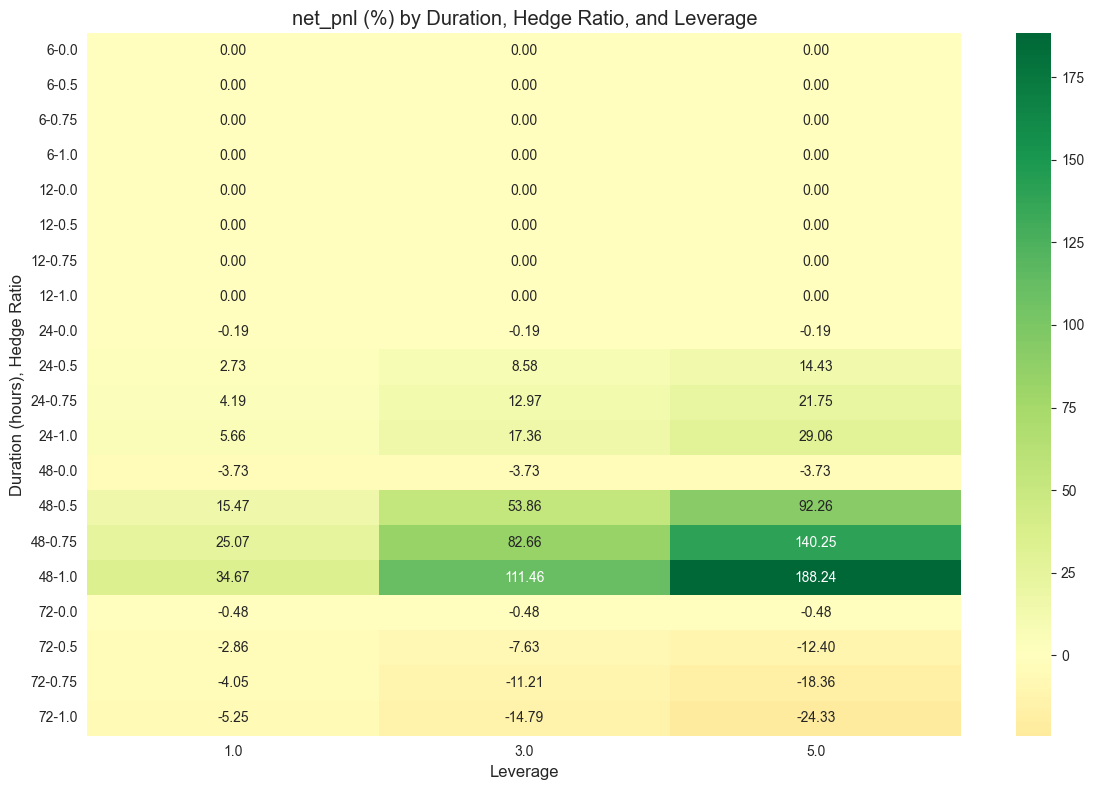

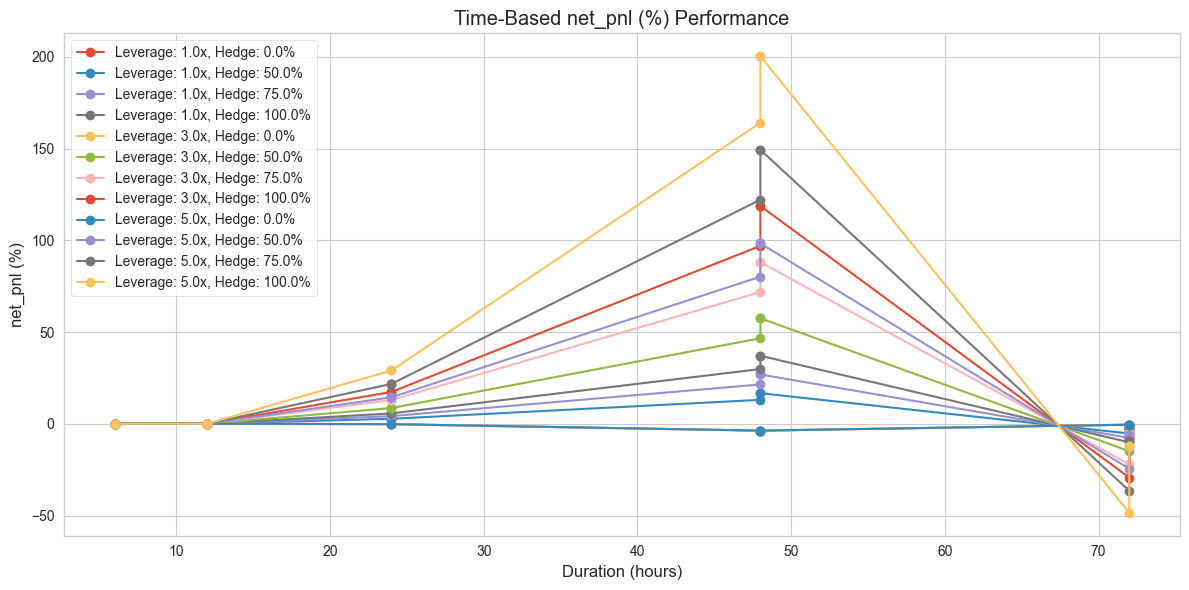

In [18]:
sol_usdc_range_results[['duration_hours', 'hedge_ratio', 'leverage', 
                 'impermanent_loss', 'lp_fees_earned', 
                 'hedge_pnl', 'funding_impact', 'net_pnl']]

# Visualize results
visualize_simulation_results(sol_usdc_range_results, 'net_pnl')

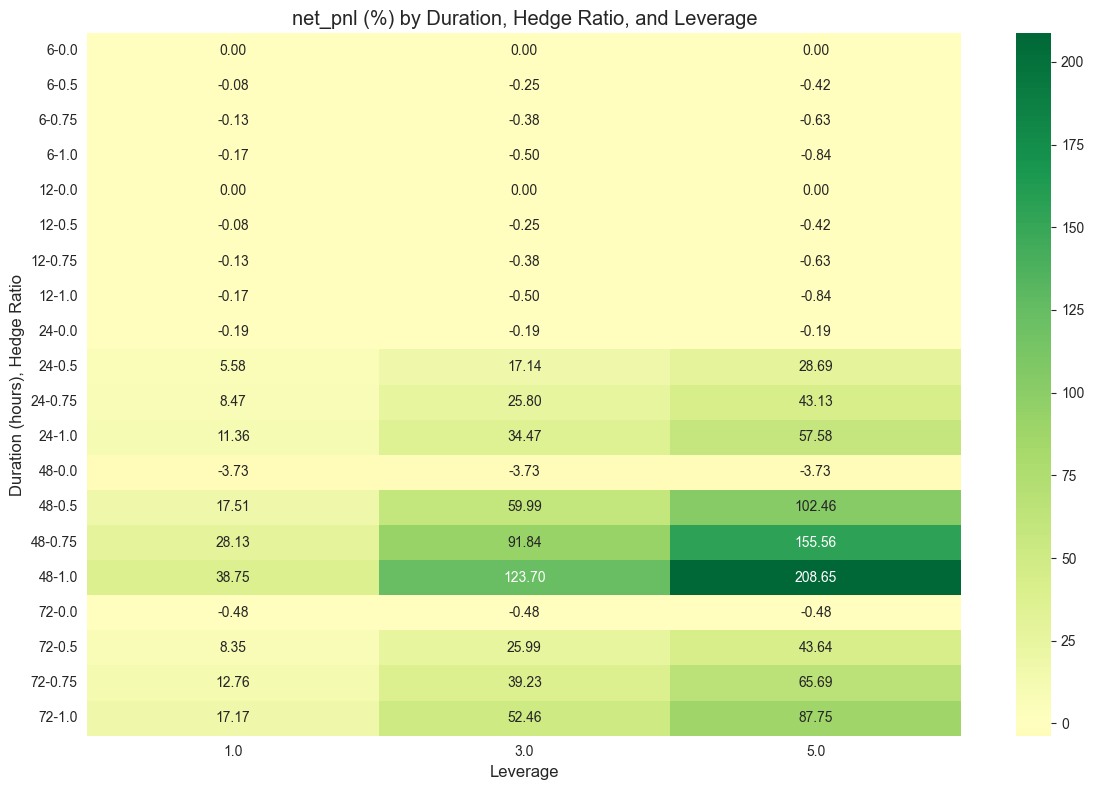

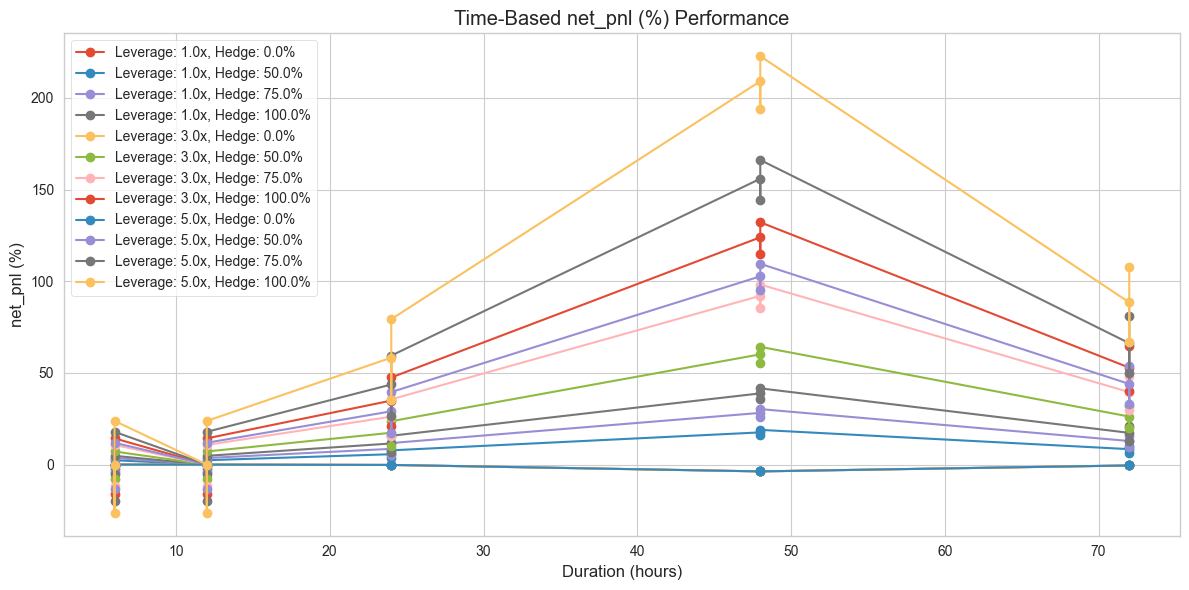

In [19]:
sol_usdc_entry_results[['duration_hours', 'hedge_ratio', 'leverage', 
                 'impermanent_loss', 'lp_fees_earned', 
                 'hedge_pnl', 'funding_impact', 'net_pnl']]

# Visualize results
visualize_simulation_results(sol_usdc_entry_results, 'net_pnl')

## Strategy Comparison and Recommendations

In [20]:
def compare_strategies(results_df: pd.DataFrame) -> pd.DataFrame:
    """
    Compare different strategies and provide recommendations
    
    Args:
        results_df: DataFrame with simulation results
        
    Returns:
        DataFrame with strategy recommendations
    """
    # Group by hedge ratio and leverage to find best performing strategies
    strategy_comparison = results_df.groupby(['hedge_ratio', 'leverage']).agg({
        'net_pnl': ['mean', 'std', 'min', 'max'],
        'impermanent_loss': 'mean',
        'lp_fees_earned': 'mean',
        'hedge_pnl': 'mean',
        'funding_impact': 'mean'
    }).reset_index()
    
    # Flatten multi-level columns
    strategy_comparison.columns = ['_'.join(col).strip('_') for col in strategy_comparison.columns.values]
    
    # Calculate risk-adjusted return (Sharpe-like ratio)
    strategy_comparison['risk_adjusted_return'] = strategy_comparison['net_pnl_mean'] / strategy_comparison['net_pnl_std']
    
    # Calculate strategy score (higher is better)
    strategy_comparison['strategy_score'] = (
        strategy_comparison['net_pnl_mean'] * 0.4 +  # Weight mean return at 40%
        strategy_comparison['risk_adjusted_return'] * 0.3 +  # Weight risk-adjusted return at 30%
        strategy_comparison['net_pnl_min'] * 0.3  # Weight worst-case scenario at 30%
    )
    
    # Sort by strategy score
    return strategy_comparison.sort_values('strategy_score', ascending=False)


Best Strategy for SOL-USDC:
Hedge Ratio: 100.0%
Leverage: 5.0x
Average Return: 70.46%
Risk-Adjusted Return: 0.86
Strategy Score: 20.55


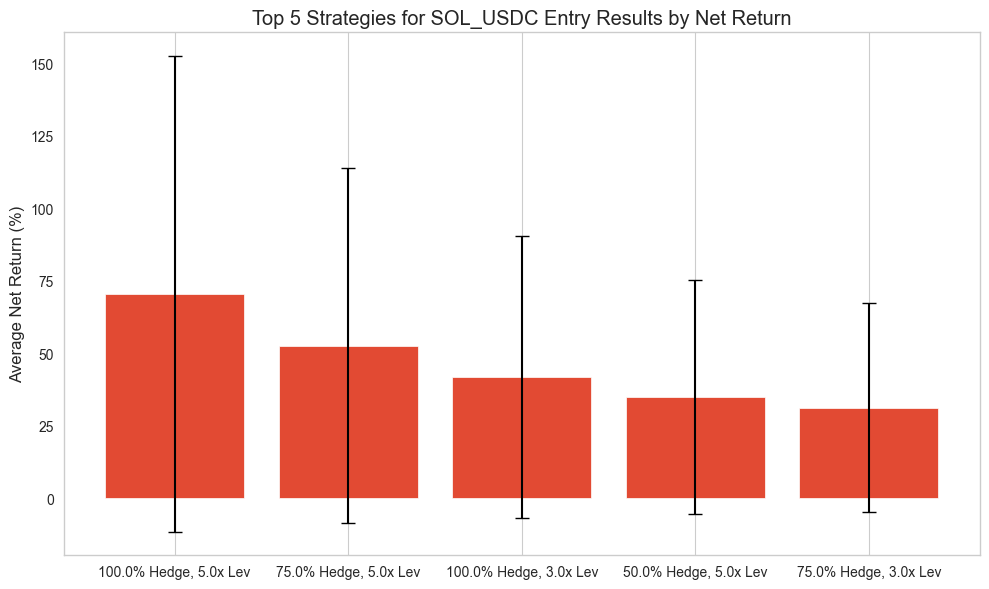

In [24]:
# Compare strategies for SOL-USDC
sol_usdc_strategy_comparison = compare_strategies(sol_usdc_entry_results)

# Display strategy comparison
sol_usdc_strategy_comparison[['hedge_ratio', 'leverage', 
                            'net_pnl_mean', 'net_pnl_std', 
                            'risk_adjusted_return', 'strategy_score']]

# Identify the best strategies
best_strategy = sol_usdc_strategy_comparison.iloc[0]
print(f"\nBest Strategy for SOL-USDC:")
print(f"Hedge Ratio: {best_strategy['hedge_ratio']*100}%")
print(f"Leverage: {best_strategy['leverage']}x")
print(f"Average Return: {best_strategy['net_pnl_mean']:.2f}%")
print(f"Risk-Adjusted Return: {best_strategy['risk_adjusted_return']:.2f}")
print(f"Strategy Score: {best_strategy['strategy_score']:.2f}")

# Plot top strategies comparison
top_strategies = sol_usdc_strategy_comparison.head(5)
plt.figure(figsize=(10, 6))
plt.bar(
    [f"{r*100}% Hedge, {l}x Lev" for r, l in zip(top_strategies['hedge_ratio'], top_strategies['leverage'])],
    top_strategies['net_pnl_mean'],
    yerr=top_strategies['net_pnl_std'],
    capsize=5
)
plt.title('Top 5 Strategies for SOL_USDC Entry Results by Net Return')
plt.ylabel('Average Net Return (%)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Best Strategy for SOL-USDC:
Hedge Ratio: 100.0%
Leverage: 5.0x
Average Return: 38.60%
Risk-Adjusted Return: 0.48
Strategy Score: 1.03


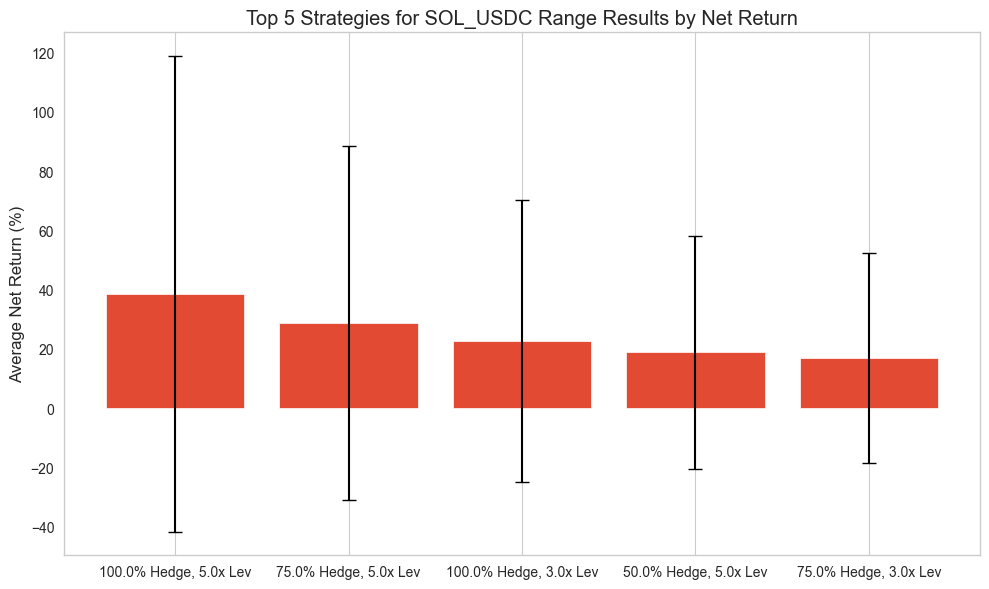

In [23]:
# Compare strategies for SOL-USDC
sol_usdc_strategy_comparison = compare_strategies(sol_usdc_range_results)

# Display strategy comparison
sol_usdc_strategy_comparison[['hedge_ratio', 'leverage', 
                            'net_pnl_mean', 'net_pnl_std', 
                            'risk_adjusted_return', 'strategy_score']]

# Identify the best strategies
best_strategy = sol_usdc_strategy_comparison.iloc[0]
print(f"\nBest Strategy for SOL-USDC:")
print(f"Hedge Ratio: {best_strategy['hedge_ratio']*100}%")
print(f"Leverage: {best_strategy['leverage']}x")
print(f"Average Return: {best_strategy['net_pnl_mean']:.2f}%")
print(f"Risk-Adjusted Return: {best_strategy['risk_adjusted_return']:.2f}")
print(f"Strategy Score: {best_strategy['strategy_score']:.2f}")

# Plot top strategies comparison
top_strategies = sol_usdc_strategy_comparison.head(5)
plt.figure(figsize=(10, 6))
plt.bar(
    [f"{r*100}% Hedge, {l}x Lev" for r, l in zip(top_strategies['hedge_ratio'], top_strategies['leverage'])],
    top_strategies['net_pnl_mean'],
    yerr=top_strategies['net_pnl_std'],
    capsize=5
)
plt.title('Top 5 Strategies for SOL_USDC Range Results by Net Return')
plt.ylabel('Average Net Return (%)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [26]:
!pip install requests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [requests]


In [27]:
import pandas as pd
import requests
from datetime import datetime
import time

def get_funding_rate_history(symbol, limit=100):
    base_url = "https://fapi.binance.com"
    endpoint = "/fapi/v1/fundingRate"
    
    params = {
        'symbol': symbol,
        'limit': limit
    }
    
    response = requests.get(base_url + endpoint, params=params)
    data = response.json()
    
    # Create DataFrame
    df = pd.DataFrame(data)
    
    # Convert timestamp to datetime
    if 'fundingTime' in df.columns:
        df['timestamp'] = pd.to_datetime(df['fundingTime'], unit='ms')
    
    # Format the dataframe to match your desired output
    if not df.empty:
        df['pair'] = symbol.replace('USDT', '/USDT:USDT')  # Adjust formatting as needed
        result_df = df[['timestamp', 'pair', 'fundingRate']].rename(columns={'fundingRate': 'rate'})
        return result_df
    return pd.DataFrame()

# Example usage for your pairs (assuming they exist on Binance)
# Note: You'll need to adjust the symbols to match Binance's format
try:
    # For Fartcoin-SOL (assuming the correct symbol format is FARTSOLUSDT)
    fartcoin_sol_df = get_funding_rate_history("FARTSOLPERPETUAL")
    
    # For JLP-SOL (assuming the correct symbol format is JLPSOLUSDT)
    jlp_sol_df = get_funding_rate_history("JLPSOLPERPETUAL")
    
    # Combine and save to CSV
    combined_df = pd.concat([fartcoin_sol_df, jlp_sol_df])
    combined_df.to_csv('funding_rates.csv', index=False)
    print("Data saved successfully!")
except Exception as e:
    print(f"Error retrieving data: {e}")


Data saved successfully!


In [29]:
!pip install python-binance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 8.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14/14 [python-binance]m [aiohttp]er]e]


In [30]:
from binance.client import Client

client = Client()
tickers = client.get_all_tickers()
ticker_df = pd.DataFrame(tickers)

# Check if your symbols exist
print(ticker_df[ticker_df['symbol'].str.contains('SOL')])


         symbol            price
777      SOLBNB       0.25810000
778      SOLBTC       0.00158320
779     SOLUSDT     168.36000000
780     SOLBUSD      74.62000000
1451     SOLEUR     148.28000000
1487     SOLGBP      88.08000000
1494     SOLTRY    6538.20000000
1496     SOLBRL     954.80000000
1517     SOLRUB    5467.00000000
1607     SOLAUD      28.48000000
1619    SOLBIDR        311087.00
1648    SOLUSDC     168.46000000
1689     SOLETH       0.06663000
2183    SOLTUSD     167.44000000
2290   SOLFDUSD     168.66000000
2613     SOLJPY   24231.00000000
2760   BNSOLSOL       1.05220000
2764  BNSOLUSDT     177.10000000
2907   SOLVUSDT       0.04231000
2908    SOLVBNB       0.00006454
2909  SOLVFDUSD       0.04235000
2910    SOLVTRY       1.64300000
2957     SOLMXN    3256.00000000
2959     SOLARS  198636.00000000
